In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # to separate pages based on language (regular expression)
import matplotlib.pyplot as plt # to visualize data

from datetime import datetime

import itertools
import warnings
warnings.filterwarnings("ignore")


In [3]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA

In [5]:
train_df = pd.read_csv('/Users/ta.duong/data/AggregatedData.csv')
train_df

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1/1/2011,50,20,30,123800,41700,82100,Saturday,H,H,WHH
1,Mount Road ATM,1/1/2011,253,67,186,767900,270900,497000,Saturday,C,H,WHH
2,Airport ATM,1/1/2011,98,56,42,503400,347700,155700,Saturday,C,H,WHH
3,KK Nagar ATM,1/1/2011,265,159,106,945300,532600,412700,Saturday,C,H,WHH
4,Christ College ATM,1/1/2011,74,25,49,287700,148200,139500,Saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,FRIDAY,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,FRIDAY,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,FRIDAY,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,FRIDAY,H,H,WHH


In [6]:
changed_column = ['Transaction Date']

In [7]:
for date in changed_column:
 train_df[date] = train_df[date].str.replace('/', '-')

In [8]:
changed_column1 = ['Weekday']

In [9]:
for days in changed_column1:
 train_df[days] = train_df[days].str.lower()

In [10]:
train_df

,ATM Name,Transaction Date,No Of Withdrawals,No Of XYZ Card Withdrawals,No Of Other Card Withdrawals,Total amount Withdrawn,Amount withdrawn XYZ Card,Amount withdrawn Other Card,Weekday,Festival Religion,Working Day,Holiday Sequence
0,Big Street ATM,1-1-2011,50,20,30,123800,41700,82100,saturday,H,H,WHH
1,Mount Road ATM,1-1-2011,253,67,186,767900,270900,497000,saturday,C,H,WHH
2,Airport ATM,1-1-2011,98,56,42,503400,347700,155700,saturday,C,H,WHH
3,KK Nagar ATM,1-1-2011,265,159,106,945300,532600,412700,saturday,C,H,WHH
4,Christ College ATM,1-1-2011,74,25,49,287700,148200,139500,saturday,C,H,WHH
...,...,...,...,...,...,...,...,...,...,...,...,...
11584,Big Street ATM,29-09-2017,137,34,103,468800,146200,322600,friday,H,H,WHH
11585,Mount Road ATM,29-09-2017,79,27,52,305100,172500,132600,friday,H,H,WHH
11586,Airport ATM,29-09-2017,117,77,40,709900,576800,133100,friday,H,H,WHH
11587,KK Nagar ATM,29-09-2017,76,48,28,408700,279900,128800,friday,H,H,WHH


In [11]:
train_df['Transaction Date'] = pd.to_datetime(train_df['Transaction Date'], format='%d-%m-%Y')

In [12]:
ATM_Name = train_df.groupby('ATM Name')
ap_atm_df = ATM_Name.get_group('Mount Road ATM')
df = ap_atm_df[['Transaction Date', 'Total amount Withdrawn', 'Weekday', 'Festival Religion', 'Working Day', 'Holiday Sequence']]
df = df.set_index('Transaction Date')
df

,Total amount Withdrawn,Weekday,Festival Religion,Working Day,Holiday Sequence
Transaction Date,,,,,
2011-01-01,767900,saturday,C,H,WHH
2011-01-02,529300,sunday,NH,H,HHW
2011-01-03,897100,monday,NH,W,WWW
2011-01-04,826000,tuesday,NH,W,WWW
2011-01-05,754400,wednesday,NH,W,WWW
...,...,...,...,...,...
2017-09-25,447400,monday,NH,W,HWW
2017-09-26,153800,tuesday,NH,W,WWW
2017-09-27,167100,wednesday,NH,W,WWW


In [13]:
# biến matrix one hot thứ
one_hot = pd.get_dummies(df['Weekday'])
df = df.drop('Weekday',axis = 1)
df = df.join(one_hot)

#biến matrix on hot lễ hội tôn giáo
one_hot = pd.get_dummies(df['Festival Religion'])
df = df.drop('Festival Religion',axis = 1)
df = df.join(one_hot)

#biến matrix on hot ngày làm việc
one_hot = pd.get_dummies(df['Working Day'])
one_hot = one_hot.rename(columns = {'H':'H1'}) # trùng với tên cũ
df = df.drop('Working Day',axis = 1)
df = df.join(one_hot)

# #biến matrix on hot ngày lễ
one_hot = pd.get_dummies(df['Holiday Sequence'])
df = df.drop('Holiday Sequence',axis = 1)
df = df.join(one_hot)

df

,Total amount Withdrawn,friday,monday,saturday,sunday,thursday,tuesday,wednesday,C,H,...,H1,W,HHH,HHW,HWH,HWW,WHH,WHW,WWH,WWW
Transaction Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,767900,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
2011-01-02,529300,0,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2011-01-03,897100,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2011-01-04,826000,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2011-01-05,754400,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-25,447400,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2017-09-26,153800,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2017-09-27,167100,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [14]:
#define function for ADF test
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(25, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    pvalue = dftest[1]
    #Add Critical Values
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    print(dfoutput)

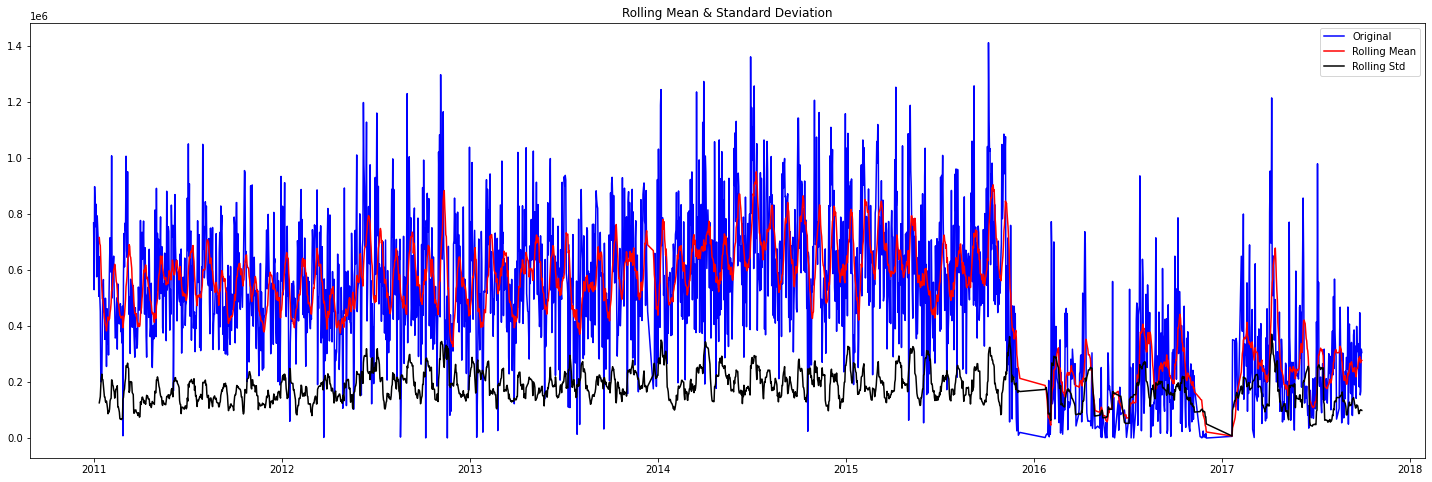

Results of Dickey-Fuller Test:
p-value = 0.0004. The series is likely stationary.
Test Statistic                   -4.302468
p-value                           0.000440
#Lags Used                       20.000000
Number of Observations Used    2235.000000
Critical Value (1%)              -3.433279
Critical Value (5%)              -2.862834
Critical Value (10%)             -2.567459
dtype: float64


In [15]:
test_stationarity(df['Total amount Withdrawn'])

In [16]:
df_s = df.drop('Total amount Withdrawn',axis = 1)
df_s

,friday,monday,saturday,sunday,thursday,tuesday,wednesday,C,H,M,...,H1,W,HHH,HHW,HWH,HWW,WHH,WHW,WWH,WWW
Transaction Date,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
2011-01-02,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2011-01-03,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2011-01-04,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2011-01-05,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-09-25,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2017-09-26,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2017-09-27,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1


In [17]:
from pmdarima import auto_arima


In [18]:
tr_end = '2015-12-01'
tes_start = '2013-01-02'
tes_end = '2013-05-01'

In [19]:
auto_arima(df['Total amount Withdrawn'], exogenous=df_s, seasonal=True, m=7, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=18.53 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=62624.259, Time=0.22 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=61757.778, Time=1.64 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=61569.350, Time=1.91 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=77040.122, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=61642.655, Time=1.00 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=61571.326, Time=4.56 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=61540.315, Time=3.63 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=61526.574, Time=8.34 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=14.67 sec
 ARIMA(0,1,1)(2,0,1)[7] intercept   : AIC=61521.192, Time=8.49 sec
 ARIMA(0,1,1)(2,0,0)[7] intercept   : AIC=61532.141, Time=5.11 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=61569.884, Time=2.11 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=62177.528, Time=6.99 sec
 ARIMA(1,1,1)(2,0,1)[7] inter

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2256
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood              -30633.099
Date:                           Tue, 04 May 2021   AIC                          61320.198
Time:                                   16:45:08   BIC                          61474.663
Sample:                                        0   HQIC                         61376.571
                                          - 2256                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
friday       486.9730   2.13e+04      0.023      0.982   -4.13e+04    4.23e+04
monday      -110.0940   2.15e+04     -0.005      0.996   -4.22e+04     4.2e+04
saturday   -1020.4550   3.05e+04     -0.033      0.973   -6.09e+04    5.88e+04
sunday       153.0144   2.92e+04      0.005      0.996   -5.71e+04    5.74e+04
thursday    -120.6043   1.96e+04     -0.006      0.995   -3.86e+04    3.83e+04
tuesday       58.5206   1.95e+04      0.003      0.998   -3.82e+04    3.83e+04
wednesday    -51.4504   1.96e+04     -0.003      0.998   -3.84e+04    3.83e+04
C            454.4892   3.49e+04      0.013      0.990    -6.8e+04    6.89e+04
H           -165.7965   1.89e+04     -0.009      0.993   -3.72e+04    3.69e+04
M            -88.6935   2.64e+04     -0.003      0.997   -5.18e+04    5.16e+04
N             13.4262   2.45e+04      0.001      1.000   -4.79e+04    4.79e+04
NH          -394.9637   2.31e+04     -0.017      0.986   -4.56e+04    4.48e+04
H1           659.5293   1.47e+04      0.045      0.964   -2.81e+04    2.95e+04
W            -62.6713   1.51e+04     -0.004      0.997   -2.97e+04    2.96e+04
HHH          174.4284   3.15e+04      0.006      0.996   -6.17e+04     6.2e+04
HHW            1.2388   1.74e+04   7.14e-05      1.000    -3.4e+04     3.4e+04
HWH            6.0657   2.67e+04      0.000      1.000   -5.23e+04    5.23e+04
HWW           34.0045   1.84e+04      0.002      0.999   -3.61e+04    3.62e+04
WHH           71.1846   3.11e+04      0.002      0.998   -6.08e+04     6.1e+04
WHW          -51.0302   3.61e+04     -0.001      0.999   -7.08e+04    7.07e+04
WWH          -66.2841   1.92e+04     -0.003      0.997   -3.77e+04    3.76e+04
WWW          -10.5139   1.96e+04     -0.001      1.000   -3.84e+04    3.84e+04
ar.L1          0.3674      0.019     19.842      0.000       0.331       0.404
ma.L1         -0.9887      0.004   -281.020      0.000      -0.996      -0.982
ar.S.L7        0.9114      0.016     57.332      0.000       0.880       0.943
ma.S.L7       -0.7588      0.025    -29.996      0.000      -0.808      -0.709
sigma2      3.533e+10      0.249   1.42e+11      0.000    3.53e+10    3.53e+10
===================================================================================
Ljung-Box (L1) (Q):                  15.52   Jarque-Bera (JB):               125.53
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.38
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.23e+26. Standard errors may be unstable.
"""

In [28]:
mod = sm.tsa.statespace.SARIMAX(endog = df['Total amount Withdrawn'][:tr_end],
                                exog = df_s[:tr_end],
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 7),
                                enforce_stationarity=True,
                                enforce_invertibility=True)

results = mod.fit()

print(results.summary())

/Users/ta.duong/opt/anaconda3/envs/crawl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/Users/ta.duong/opt/anaconda3/envs/crawl/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:            Total amount Withdrawn   No. Observations:                 1779
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 7)   Log Likelihood              -24176.800
Date:                           Tue, 04 May 2021   AIC                          48407.599
Time:                                   16:51:59   BIC                          48555.647
Sample:                                        0   HQIC                         48462.283
                                          - 1779                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
friday       729.4147   2.62e+04      0.028      0.978   -5.07e+04    5.21e+04
monday         7.5247   2.52e+04      0.000

<AxesSubplot:xlabel='Transaction Date'>

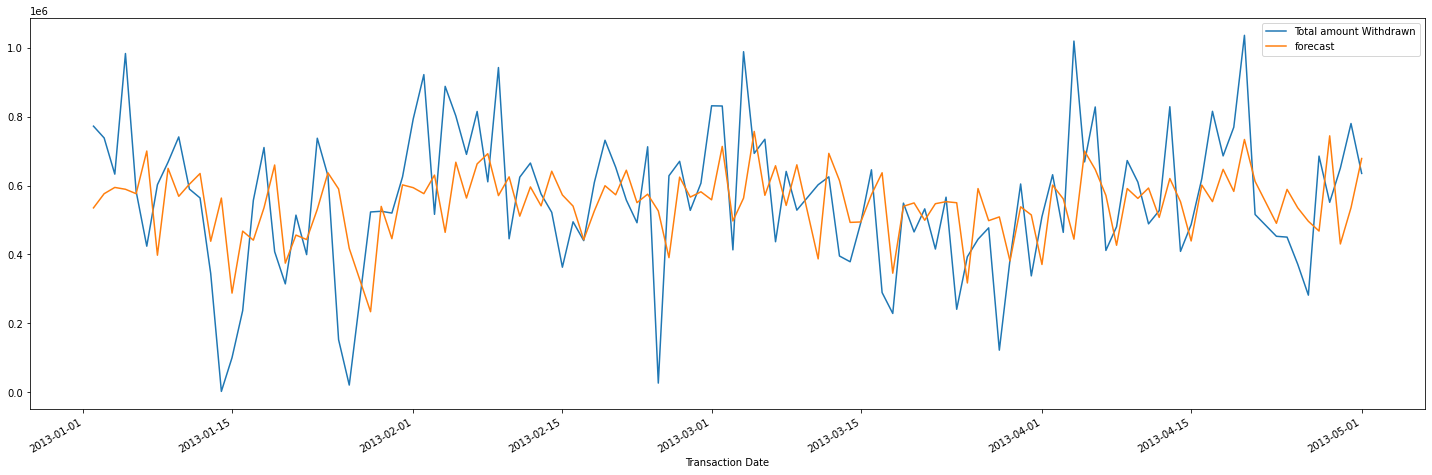

In [29]:
a = df
a['forecast'] = results.predict(start = tes_start, end = tes_end, exog = df_s[tes_start:tes_end], dynamic= False)
a[tes_start:tes_end][['Total amount Withdrawn', 'forecast']].plot(figsize=(25, 8))


In [32]:
df[tes_start:tes_end]['Total amount Withdrawn'].mean()

560452.1367521368

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(a[tes_start:tes_end]['forecast'],df[tes_start:tes_end]['Total amount Withdrawn']))
print(rmse)

194097.17493897295
